# Global Power Plant Data

## Data Description

Globel power plant database is an open source data of power plants around the world. The whole data is brought together to make it easier to draw insights and analyse data. The data consists of aproximately 35000 plants in 167 countries. The data contains informaltion on plant capacity, generation and ownership.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import KFold, cross_val_score
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.utils import resample
import pickle

import warnings
warnings.filterwarnings('ignore')

### Loading Dataset

In [2]:
df=pd.read_csv(r"database_IND.csv")
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [3]:
df.shape

(908, 25)

number of rows= 908

number of columns= 25

In [4]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

The database includes the following indicators:

- country (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]

- country_long (text): longer form of the country designation

- name (text): name or title of the power plant, generally in Romanized form

- gppd_idnr (text): 10 or 12 character identifier for the power plant

- capacity_mw (number): electrical generating capacity in megawatts

- latitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

- longitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

- primary_fuel (text): energy source used in primary electricity generation or export

- other_fuel1 (text): energy source used in electricity generation or export

- other_fuel2 (text): energy source used in electricity generation or export

- other_fuel3 (text): energy source used in electricity generation or export

- commissioning_year (number): year of plant operation, weighted by unit-capacity when data is available

- owner (text): majority shareholder of the power plant, generally in Romanized form

- source (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form

- url (text): web document corresponding to the `source` field

- geolocation_source (text): attribution for geolocation information

- wepp_id (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.

- year_of_capacity_data (number): year the capacity information was reported

- generation_gwh_2013 (number): electricity generation in gigawatt-hours reported for the year 2013

- generation_gwh_2014 (number): electricity generation in gigawatt-hours reported for the year 2014

- generation_gwh_2015 (number): electricity generation in gigawatt-hours reported for the year 2015

- generation_gwh_2016 (number): electricity generation in gigawatt-hours reported for the year 2016

- generation_gwh_2017 (number): electricity generation in gigawatt-hours reported for the year 2017

- generation_data_source (text): attribution for the reported generation information

- estimated_generation_gwh_2013 (number): estimated electricity generation in gigawatt-hours

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
country                     908 non-null object
country_long                908 non-null object
name                        908 non-null object
gppd_idnr                   908 non-null object
capacity_mw                 908 non-null float64
latitude                    862 non-null float64
longitude                   862 non-null float64
primary_fuel                908 non-null object
other_fuel1                 199 non-null object
other_fuel2                 1 non-null object
other_fuel3                 0 non-null float64
commissioning_year          528 non-null float64
owner                       342 non-null object
source                      908 non-null object
url                         908 non-null object
geolocation_source          889 non-null object
wepp_id                     0 non-null float64
year_of_capacity_data       520 non-null float64
generation_gwh_2013         38

 We observe our data has too many missing values therfore we will first deal with them

### Dealing with null values

In [6]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

Following coloumns have more tham 75% of data missing and hence we can drop them.

other_fuel1, other_fuel2, other_fuel3, wepp_id and estimated_generation_gwh

In [7]:
df=df.drop(columns=["other_fuel1", "other_fuel2", "other_fuel3", "wepp_id", "estimated_generation_gwh"],axis=1)

We will now deal with null values using imputational techniques.

Since we cannot determine latitude and longitude we will not use this in our model

In [8]:
df=df.drop(columns=["latitude","longitude"])

In [9]:
print(df.groupby("country")["geolocation_source"].value_counts().astype(int).to_dict())
df["geolocation_source"].fillna(value="WRI",inplace=True)

{('IND', 'WRI'): 766, ('IND', 'Industry About'): 119, ('IND', 'National Renewable Energy Laboratory'): 4}


In [10]:
df["year_of_capacity_data"].value_counts()

2018.0    520
Name: year_of_capacity_data, dtype: int64

Since "year_of_capacity_data" column does not have any variable data and has missing values therefore we cannot draw conclusions from this feature and hence we will remove this column from our data frame. 

In [11]:
df=df.drop(columns=["year_of_capacity_data"])

In [12]:
knn_imp=KNNImputer()
df1=knn_imp.fit_transform(df[["capacity_mw","generation_gwh_2013","generation_gwh_2014",
                              "generation_gwh_2015","generation_gwh_2016","generation_gwh_2017"]])
df[["capacity_mw","generation_gwh_2013","generation_gwh_2014","generation_gwh_2015","generation_gwh_2016","generation_gwh_2017"]]=df1

In [13]:
knn_imp=KNNImputer()
df1=knn_imp.fit_transform(df[["capacity_mw","commissioning_year"]])
df[["capacity_mw","commissioning_year"]]=df1

In [14]:
print(df.groupby("source")["generation_data_source"].value_counts().astype(int).to_dict())
df["generation_data_source"].fillna(value=df["source"],inplace=True)

{('Central Electricity Authority', 'Central Electricity Authority'): 450}


We observe from looking at data that owner and source are closely related and hence we can drop one of it.

In [15]:
df=df.drop(["owner"],axis=1)

## EDA

In [16]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,primary_fuel,commissioning_year,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,Solar,2011.0,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,88.381870,41.025840,17.40454,24.725750,22.721820,National Renewable Energy Laboratory
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,Coal,1994.8,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,313.669770,315.005060,238.18310,247.110240,184.880950,Ultratech Cement ltd
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,Wind,1982.0,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,122.026800,105.342640,118.54032,103.159610,114.663800,CDM
3,IND,India,AGARTALA GT,IND0000001,135.0,Gas,2004.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,631.777928,617.789264,843.74700,886.004428,663.774500,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,Coal,2015.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,1668.290000,3035.550000,5916.37000,6243.000000,5385.579736,Central Electricity Authority


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 16 columns):
country                   908 non-null object
country_long              908 non-null object
name                      908 non-null object
gppd_idnr                 908 non-null object
capacity_mw               908 non-null float64
primary_fuel              908 non-null object
commissioning_year        908 non-null float64
source                    908 non-null object
url                       908 non-null object
geolocation_source        908 non-null object
generation_gwh_2013       908 non-null float64
generation_gwh_2014       908 non-null float64
generation_gwh_2015       908 non-null float64
generation_gwh_2016       908 non-null float64
generation_gwh_2017       908 non-null float64
generation_data_source    908 non-null object
dtypes: float64(7), object(9)
memory usage: 113.6+ KB


In [18]:
df.shape

(908, 16)

Now our data has 908 rows and 16 columns.

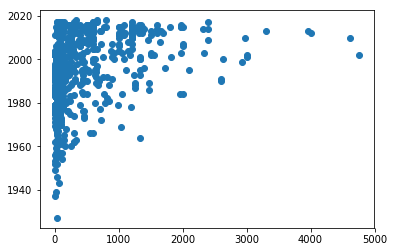

In [19]:
plt.scatter(x=df["capacity_mw"],y=df["commissioning_year"])

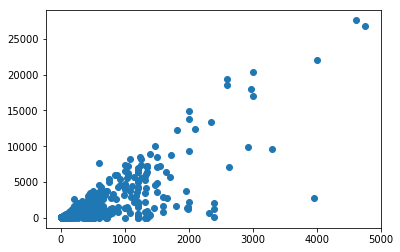

In [20]:
plt.scatter(x=df["capacity_mw"],y=df["generation_gwh_2013"])

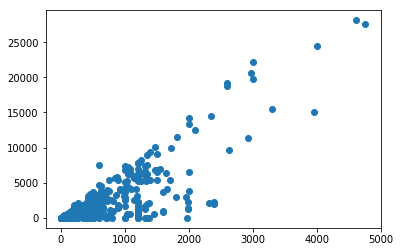

In [21]:
plt.scatter(x=df["capacity_mw"],y=df["generation_gwh_2014"])

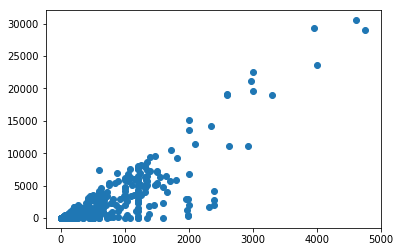

In [22]:
plt.scatter(x=df["capacity_mw"],y=df["generation_gwh_2015"])

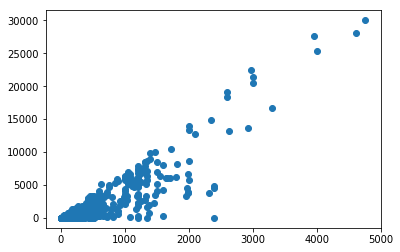

In [23]:
plt.scatter(x=df["capacity_mw"],y=df["generation_gwh_2016"])

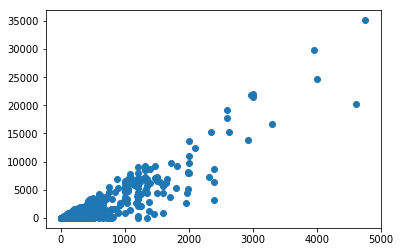

In [24]:
plt.scatter(x=df["capacity_mw"],y=df["generation_gwh_2017"])

In [25]:
df["primary_fuel"].value_counts()

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64

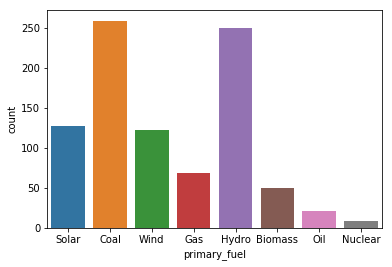

In [26]:
sns.countplot(df["primary_fuel"],data=df)

In [27]:
df.describe()

,capacity_mw,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,321.046378,1993.666079,1116.423680,1170.396613,1201.947246,1237.746962,1291.421938
std,580.221767,15.114923,2702.346698,2912.996549,3102.141322,3124.945033,3182.953547
min,0.000000,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.837500,1984.000000,88.381870,41.025840,17.404540,24.725750,22.721820
50%,60.000000,1995.000000,154.923420,143.272040,119.640616,119.289555,123.355125
75%,388.125000,2004.000000,781.149572,746.394413,693.127228,715.231373,814.488625
max,4760.000000,2018.000000,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000


In [28]:
obj_lst=["primary_fuel","name","source","geolocation_source","generation_data_source"]
lab_enc= LabelEncoder()
for i in obj_lst:
    df1= lab_enc.fit_transform(df[i])
    df[i]=df1
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,primary_fuel,commissioning_year,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,IND,India,0,WRI1020239,2.5,6,2011.0,109,http://www.nrel.gov/csp/solarpaces/project_det...,1,88.381870,41.025840,17.40454,24.725750,22.721820,109
1,IND,India,1,WRI1019881,98.0,1,1994.8,174,http://www.ultratechcement.com/,2,313.669770,315.005060,238.18310,247.110240,184.880950,174
2,IND,India,2,WRI1026669,39.2,7,1982.0,21,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,2,122.026800,105.342640,118.54032,103.159610,114.663800,21
3,IND,India,3,IND0000001,135.0,2,2004.0,22,http://www.cea.nic.in/,2,631.777928,617.789264,843.74700,886.004428,663.774500,22
4,IND,India,4,IND0000002,1800.0,1,2015.0,22,http://www.cea.nic.in/,2,1668.290000,3035.550000,5916.37000,6243.000000,5385.579736,22


In [29]:
df.corr()

,name,capacity_mw,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
name,1.000000,0.059870,0.038752,-0.016485,-0.013801,0.035528,0.074180,0.078736,0.069977,0.061599,0.063669,-0.013801
capacity_mw,0.059870,1.000000,-0.377783,0.342435,-0.241701,0.204698,0.809128,0.848601,0.865201,0.893845,0.908813,-0.241701
primary_fuel,0.038752,-0.377783,1.000000,-0.217320,0.053609,-0.482803,-0.281220,-0.292247,-0.292976,-0.301195,-0.309074,0.053609
commissioning_year,-0.016485,0.342435,-0.217320,1.000000,-0.127105,0.134907,0.160190,0.186306,0.212837,0.239420,0.255222,-0.127105
source,-0.013801,-0.241701,0.053609,-0.127105,1.000000,-0.505823,-0.174027,-0.177824,-0.174934,-0.178396,-0.182634,1.000000
geolocation_source,0.035528,0.204698,-0.482803,0.134907,-0.505823,1.000000,0.146177,0.148586,0.146275,0.149403,0.153112,-0.505823
generation_gwh_2013,0.074180,0.809128,-0.281220,0.160190,-0.174027,0.146177,1.000000,0.972109,0.917489,0.898580,0.862982,-0.174027
generation_gwh_2014,0.078736,0.848601,-0.292247,0.186306,-0.177824,0.148586,0.972109,1.000000,0.966560,0.944885,0.918241,-0.177824
generation_gwh_2015,0.069977,0.865201,-0.292976,0.212837,-0.174934,0.146275,0.917489,0.966560,1.000000,0.978185,0.947877,-0.174934
generation_gwh_2016,0.061599,0.893845,-0.301195,0.239420,-0.178396,0.149403,0.898580,0.944885,0.978185,1.000000,0.976365,-0.178396


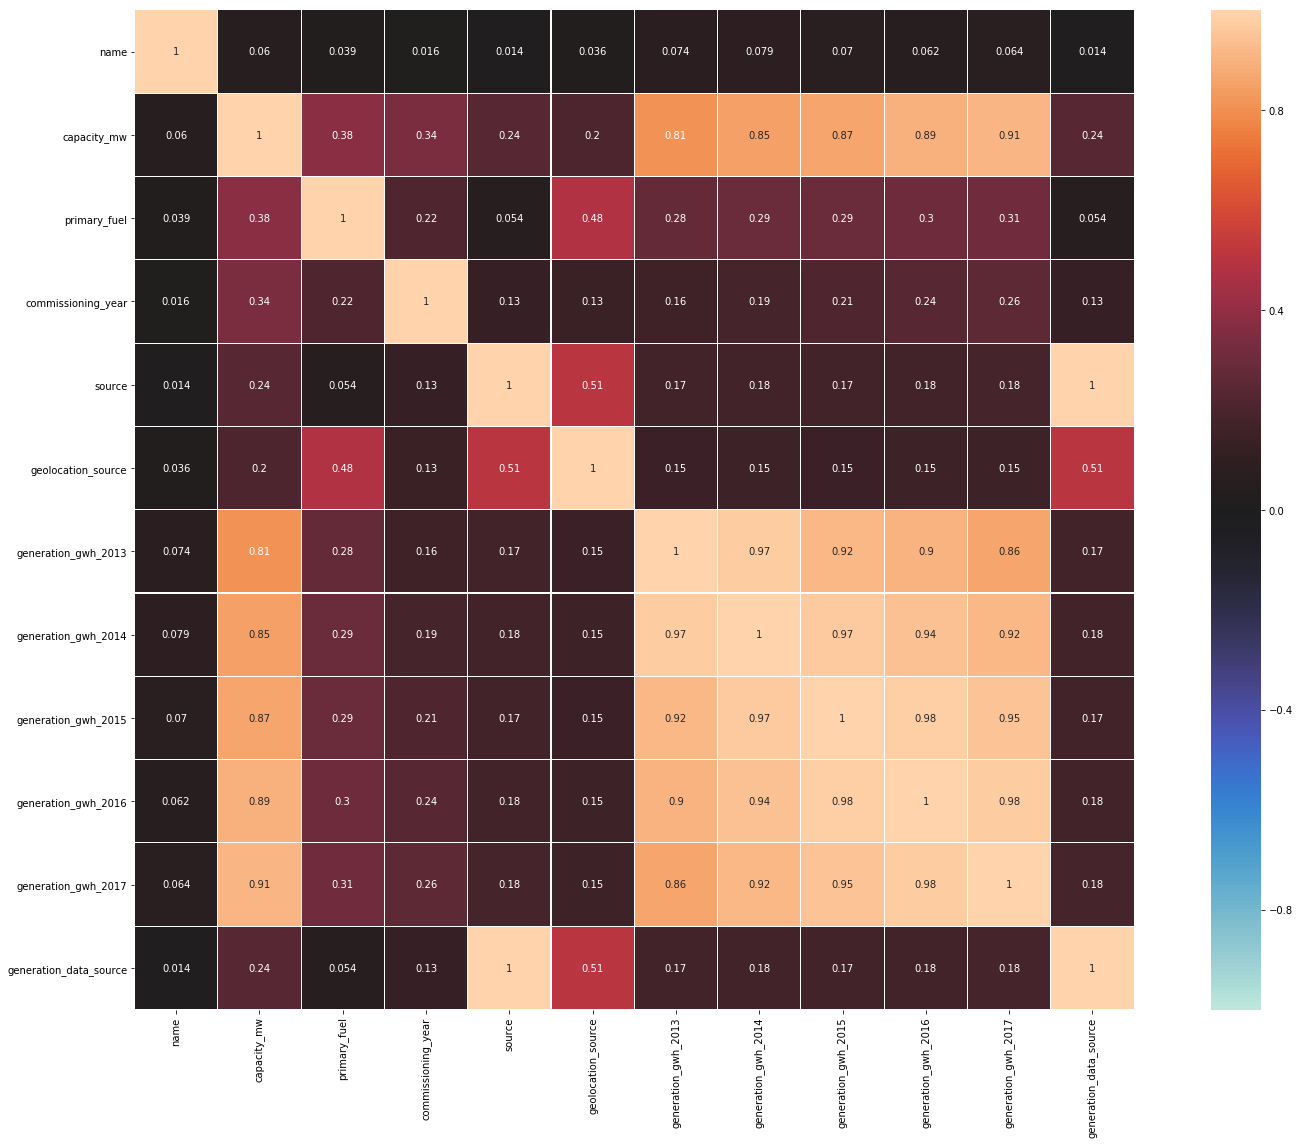

In [30]:
## HeatMap
df_corr= df.corr().abs()
plt.figure(figsize=(22,16))
sns.heatmap(df_corr, vmin=-1, vmax=1, annot=True, square=True, center=0, fmt='.2g', linewidth=.1)
plt.tight_layout()

In [31]:
corr_mat=df.corr()
corr_mat["capacity_mw"].sort_values(ascending=False)

capacity_mw               1.000000
generation_gwh_2017       0.908813
generation_gwh_2016       0.893845
generation_gwh_2015       0.865201
generation_gwh_2014       0.848601
generation_gwh_2013       0.809128
commissioning_year        0.342435
geolocation_source        0.204698
name                      0.059870
generation_data_source   -0.241701
source                   -0.241701
primary_fuel             -0.377783
Name: capacity_mw, dtype: float64

In [32]:
corr_mat=df.corr()
corr_mat["primary_fuel"].sort_values(ascending=False)

primary_fuel              1.000000
generation_data_source    0.053609
source                    0.053609
name                      0.038752
commissioning_year       -0.217320
generation_gwh_2013      -0.281220
generation_gwh_2014      -0.292247
generation_gwh_2015      -0.292976
generation_gwh_2016      -0.301195
generation_gwh_2017      -0.309074
capacity_mw              -0.377783
geolocation_source       -0.482803
Name: primary_fuel, dtype: float64

For capicity_mw "generation_gwh_2017" has maximum correlation and "name" has minimum correlation.

For primary_fuel "generation_data_source" has maximum correlation wheras, "name" has minimum correlation.

## Data Cleaning

We will first remove the columns that have text data and is not contributing to our target column

In [33]:
df=df.drop(columns=["country","country_long","gppd_idnr","url"])

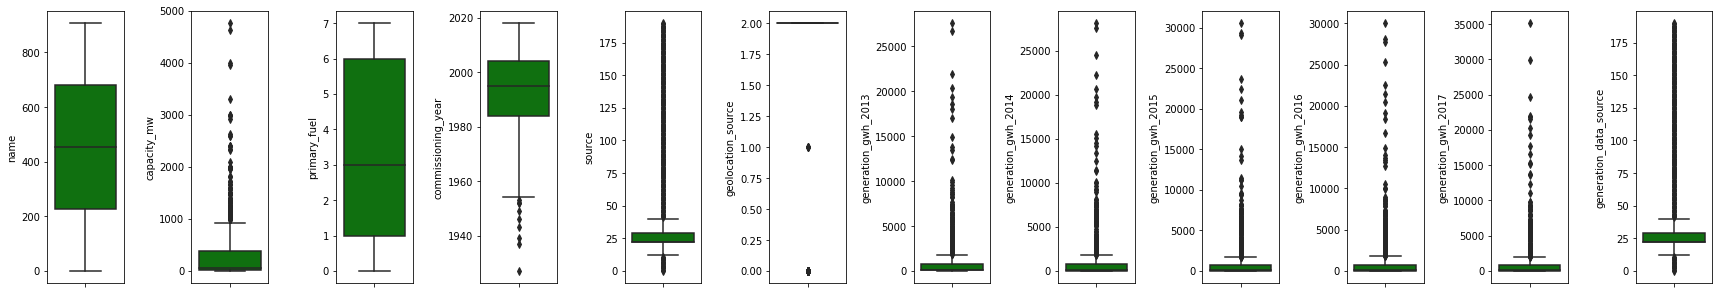

In [34]:
collist=df.columns.values
plt.figure(figsize=(30,40))
for i in range(0,len(collist)):
    plt.subplot(10,15,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

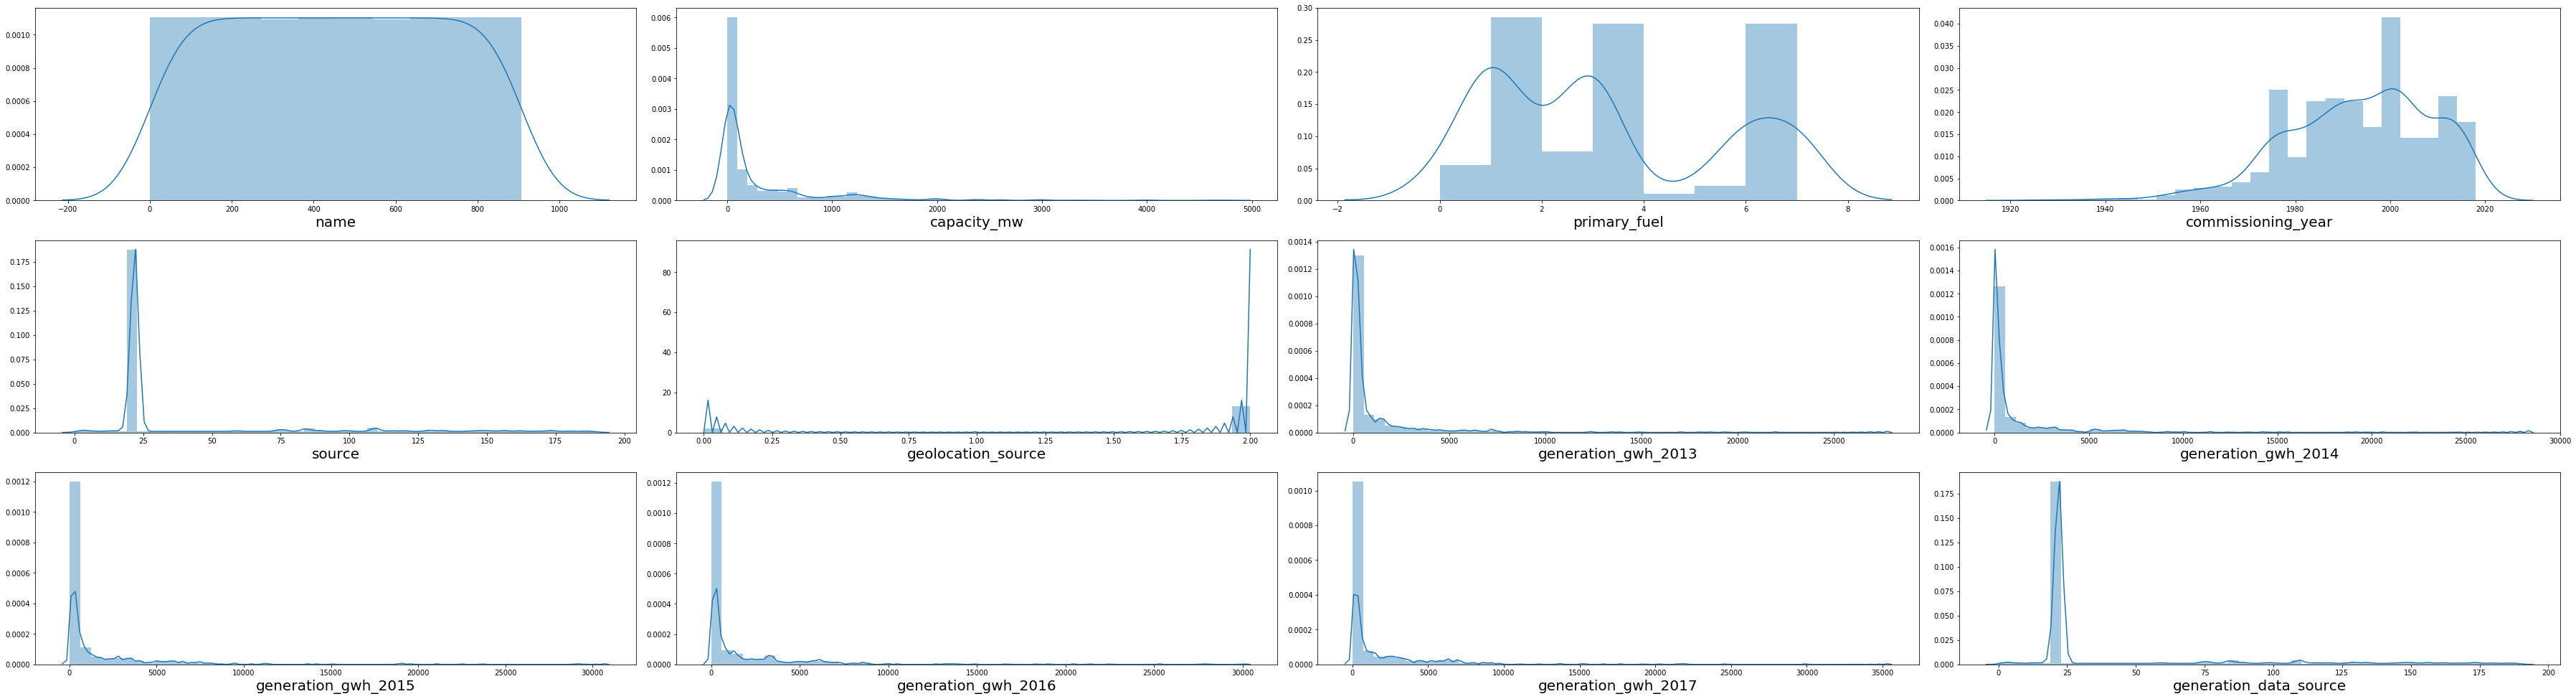

In [35]:
## checking for Normal Distribution of curve
plt.figure(figsize=(50,40),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=36:
        ax=plt.subplot(9,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.tight_layout()

We observe outiliers in our data and hence skewness. We will now remove outliers

In [36]:
z=np.abs(stats.zscore(df))
index=(np.where(z>3)[0])
df_new=df.drop(df.index[index])
df_new.shape

(864, 12)

In [37]:
print("Percentage of data loss=",((908-864)/908)*100)

Percentage of data loss= 4.845814977973569


Since percentage of data loss is less we can proceed with our new data

We have two target variable so we will first devide our dataset into two dataset.

In [38]:
df1= df_new.drop(columns=["primary_fuel"])
df2= df_new.drop(columns=["capacity_mw"])

In [39]:
x1=df1.drop(columns=["capacity_mw"])
y1=df1["capacity_mw"]
x2=df2.drop(columns=["primary_fuel"])
y2=df2["primary_fuel"]

In [40]:
x1.skew()

name                      0.021577
commissioning_year       -0.390751
source                    1.834611
geolocation_source       -2.149195
generation_gwh_2013       2.854402
generation_gwh_2014       2.755646
generation_gwh_2015       2.604322
generation_gwh_2016       2.566230
generation_gwh_2017       2.483494
generation_data_source    1.834611
dtype: float64

In [41]:
x2.skew()

name                      0.021577
commissioning_year       -0.390751
source                    1.834611
geolocation_source       -2.149195
generation_gwh_2013       2.854402
generation_gwh_2014       2.755646
generation_gwh_2015       2.604322
generation_gwh_2016       2.566230
generation_gwh_2017       2.483494
generation_data_source    1.834611
dtype: float64

We observe skewness in both sets therefore we will use power transform to remove it

In [42]:
from sklearn.preprocessing import power_transform
x1=power_transform(x1,method='yeo-johnson')

In [43]:
from sklearn.preprocessing import power_transform
x2=power_transform(x2,method='yeo-johnson')

## Model Building

### For target column : capacity_mw

In [44]:
## Scaling data
scale= StandardScaler()
x1_scaled=scale.fit_transform(x1)

In [45]:
# Splitting Data
x_train, x_test, y_train, y_test = train_test_split(x1_scaled, y1, test_size=0.25, random_state=355)

#### Linear Regression

In [46]:
lm= LinearRegression()
lm.fit(x_train,y_train)
y_pred= lm.predict(x_test)
score_lm=lm.score(x_test,y_test)
print("Linear regression: Accuracy = ",score_lm)
print("Mean Absolute Error= ",mean_absolute_error(y_test,y_pred))

Linear regression: Accuracy =  0.638756156392088
Mean Absolute Error=  170.87579976069452


#### KNN Regressor

In [47]:
knn_r=KNeighborsRegressor()
knn_r.fit(x_train, y_train)
y_pred= knn_r.predict(x_test)
score_knnr=knn_r.score(x_test,y_test)
print("KNN regression: Accuracy = ",score_knnr)
print("Mean Absolute Error= ",mean_absolute_error(y_test,y_pred))

KNN regression: Accuracy =  0.8071579443717084
Mean Absolute Error=  89.2468462962963


#### Decision Tree Regressor

In [48]:
dt_r= DecisionTreeRegressor()
dt_r.fit(x_train, y_train)
y_pred= dt_r.predict(x_test)
score_dtr=dt_r.score(x_test,y_test)
print("Decision Tree regression: Accuracy = ",score_dtr)
print("Mean Absolute Error= ",mean_absolute_error(y_test,y_pred))

Decision Tree regression: Accuracy =  0.7040260169629036
Mean Absolute Error=  93.06205555555555


#### Model Regularization

In [49]:
lasscv= LassoCV(alphas=None, max_iter=1000, normalize= True)
lasscv.fit(x_train,y_train)
alpha= lasscv.alpha_
lasso_reg= Lasso(alpha)
lasso_reg.fit(x_train,y_train)
lasso_reg.score(x_test,y_test)

0.6395422768065742

In [50]:
y_pred=lasso_reg.predict(x_test)
print("Mean Absolute Error= ",mean_absolute_error(y_test,y_pred))

Mean Absolute Error=  170.72651421463527


#### Model Evaluation

We will check for cross validation score for each model

#### Linear Regression

In [51]:
lm_cv=cross_val_score(lm,x_train, y_train,cv=5).mean()
lm_cv

0.5111488212614314

#### KNN Regressor

In [52]:
knnr_cv=cross_val_score(knn_r,x_train, y_train,cv=5).mean()
knnr_cv

0.7266800925552841

#### Decision Tree Regressor

In [53]:
dtr_cv=cross_val_score(dt_r,x_train, y_train,cv=5).mean()
dtr_cv

0.6902611708122524

In [54]:
print("Linear Regression Model: ",(score_lm-lm_cv))

Linear Regression Model:  0.1276073351306567


In [55]:
print("KNN Model: ",(score_knnr-knnr_cv))

KNN Model:  0.0804778518164243


In [56]:
print("DecisionTree Model: ",(score_dtr-dtr_cv))

DecisionTree Model:  0.013764846150651211


Decision Tree is the best model. Now we will tune our Decision Tree Model.

#### Hyper-Parameter Tuning

In [57]:
dt_r= DecisionTreeRegressor()
grid_param={'criterion':['mse','mae'],
           'max_depth':range(2,20,3),
           'min_samples_leaf':range(1,20,4),
           'min_samples_split':range(2,20,2)}
grid_search= GridSearchCV(estimator=dt_r, param_grid= grid_param, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)
best_parameter= grid_search.best_params_
print(best_parameter)

{'criterion': 'mse', 'max_depth': 14, 'min_samples_leaf': 17, 'min_samples_split': 10}


In [58]:
dt_r=DecisionTreeRegressor(criterion='mse',max_depth=17, min_samples_leaf=17, min_samples_split=16)
dt_r.fit(x_train,y_train)
y_pred=dt_r.predict(x_test)
print("R2 Score= ",dt_r.score(x_test,y_test))

R2 Score=  0.7988430686557895


In [59]:
print("Mean Absolute Error= ",mean_absolute_error(y_test,y_pred))

Mean Absolute Error=  92.9021105624631


### For target column : primary_fuel

In [60]:
## Scaling data
scale= StandardScaler()
x2_scaled=scale.fit_transform(x2)

In [61]:
lr=LogisticRegression()
for i in range(0,500):
    x_train, x_test, y_train, y_test= train_test_split(x2_scaled, y2 , test_size=0.25, random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    score_lr=accuracy_score(y_test,pred_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("Best random state is ",i)
        print("Training Score ",accuracy_score(y_train,pred_train)*100)
        print("Testing Score ",accuracy_score(y_test,pred_test)*100)

Best random state is  30
Training Score  57.407407407407405
Testing Score  57.407407407407405
Best random state is  44
Training Score  58.333333333333336
Testing Score  58.333333333333336
Best random state is  345
Training Score  58.79629629629629
Testing Score  58.79629629629629
Best random state is  436
Training Score  59.25925925925925
Testing Score  59.25925925925925


In [62]:
x_train, x_test, y_train, y_test= train_test_split(x2_scaled, y2 , test_size=0.25, random_state=436)

#### Logistic Regression

In [63]:
lr=LogisticRegression()
lr.fit(x_train, y_train)
y_pred= lr.predict(x_test)
score_lr=accuracy_score(y_test,y_pred)
print("Logistic Regression model Score =",accuracy_score(y_test,y_pred))

Logistic Regression model Score = 0.5925925925925926


#### KNN Model

In [64]:
knn=KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred= knn.predict(x_test)
score_knn=accuracy_score(y_test,y_pred)
print("knn model Score =",accuracy_score(y_test,y_pred))

knn model Score = 0.6018518518518519


#### Decision Tree Regressor

In [65]:
dt= DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred= dt.predict(x_test)
score_dt=accuracy_score(y_test,y_pred)
print("Decision Tree model Score =",accuracy_score(y_test,y_pred))

Decision Tree model Score = 0.7361111111111112


#### SVM

In [66]:
svc= SVC()
svc.fit(x_train,y_train)
y_pred= svc.predict(x_test)
score_svc=accuracy_score(y_test,y_pred)
print("SVM model Score =",accuracy_score(y_test,y_pred))

SVM model Score = 0.6296296296296297


#### Using cross_val Score to choose for best model

In [67]:
cross_val_score(lr, x1_scaled, y2, cv=5)
cvs_lr=cross_val_score(LogisticRegression(), x1_scaled, y2, cv=5).mean()
print("Logistic Regression Cross Validation score= ",cvs_lr)

Logistic Regression Cross Validation score=  0.5648205403952145


In [68]:
cvs_knn=cross_val_score(knn, x2_scaled, y2, cv=5).mean()
print("KNeighborsClassifier Cross Validation score= ",cvs_knn)

KNeighborsClassifier Cross Validation score=  0.6042142761123808


In [69]:
cross_val_score(dt, x2_scaled, y2, cv=5)
cvs_dt=cross_val_score(DecisionTreeClassifier(), x2_scaled, y2, cv=5).mean()
print("DecisionTree Classifier Cross Validation score= ",cvs_dt)

DecisionTree Classifier Cross Validation score=  0.7199287538647667


In [70]:
cross_val_score(svc, x2_scaled, y2, cv=5)
cvs_svm=cross_val_score(SVC(), x2_scaled, y2, cv=5).mean()
print("SVC Cross Validation score= ",cvs_svm)

SVC Cross Validation score=  0.6377402876730743


We will now check for difference between accuracy score and cross validation score

In [71]:
print("Logistic Regression: ",(score_lr-cvs_lr))

Logistic Regression:  0.027772052197378105


In [72]:
print("KNN Model: ",(score_knn-cvs_knn))

KNN Model:  -0.002362424260528906


In [73]:
print("Decision Tree: ",(score_dt-cvs_dt))

Decision Tree:  0.016182357246344425


In [74]:
print("SVM: ",(score_svc-cvs_svm))

SVM:  -0.008110658043444685


From the differences we observe KNN model as our best model and hence we will now move forward to tune our model. But before that we will plot ROC currve and determine ROC AUC score

### Hyper Parameter Tuning

In [75]:
knn_c=KNeighborsClassifier()
param={'n_neighbors':[3,5,7],'weights':['uniform','distance'] ,'algorithm':['auto','ball_tree'],'leaf_size':[10,20,30]}
grid_search=GridSearchCV(estimator=knn_c, param_grid=param, cv=5, n_jobs=-1)
grid_search.fit(x_train,y_train)
best_parameter=grid_search.best_params_
print(best_parameter)

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 7, 'weights': 'distance'}


In [76]:
knn_c=KNeighborsClassifier(algorithm="auto",leaf_size=10,n_neighbors=7, weights="distance")
knn_c.fit(x_train,y_train)
y_pred=knn_c.predict(x_test)
print("Accuracy Score = ",accuracy_score(y_test,y_pred))

Accuracy Score =  0.6435185185185185


In [77]:
cfm =confusion_matrix(y_test,y_pred)
print("Confusion Matrix :\n",cfm,"\n")
print("Classification Report:\n",classification_report(y_test,y_pred,digits=2))

Confusion Matrix :
 [[10  2  0  1  0  0  0  0]
 [ 5 36  3 13  0  1  0  1]
 [ 0  5  5  7  0  0  0  2]
 [ 0  5  3 31  0  1  0 15]
 [ 0  2  0  0  0  0  0  0]
 [ 2  1  2  0  0  1  0  0]
 [ 0  1  0  0  0  0 39  0]
 [ 0  0  0  5  0  0  0 17]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.77      0.67        13
           1       0.69      0.61      0.65        59
           2       0.38      0.26      0.31        19
           3       0.54      0.56      0.55        55
           4       0.00      0.00      0.00         2
           5       0.33      0.17      0.22         6
           6       1.00      0.97      0.99        40
           7       0.49      0.77      0.60        22

    accuracy                           0.64       216
   macro avg       0.50      0.52      0.50       216
weighted avg       0.64      0.64      0.64       216



### ROC AUC Curve

In [78]:
import scikitplot as skplt

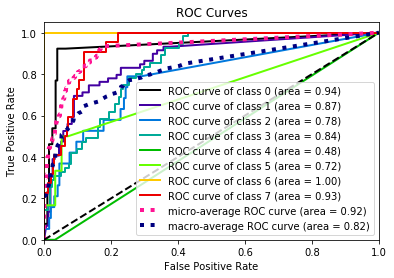

In [79]:
prob=knn_c.predict_proba(x_test)
skplt.metrics.plot_roc(y_test,prob)
plt.show()

#### Saving Model

In [80]:
filename= "Fuel_prediction.pickle"
pickle.dump(knn_c,open(filename,'wb'))

In [81]:
filename= "Capacity_Prediction.pickle"
pickle.dump(dt_r,open(filename,'wb'))